# Exercice 2 –PCA avec Scikit-Learn sur le jeu de données «iris »

## Question 1 : Charger le jeu de données «iris»

Lire  le  dataset  iris  en  utilisant  la  méthode  datasets.load_iris()  de  sklearn.datasets. Explorer ce datase

In [4]:
from Ex1 import *
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [5]:
# Charger le dataset iris
iris = load_iris()

# Créer un DataFrame à partir des données iris
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

def explore_dataset (df: pd.DataFrame) -> None:
    """
    Explore the given dataset by displaying the first 5 rows, the information and the descriptive statistics of the DataFrame.

    Parameters:
        df (pd.DataFrame): The DataFrame to be explored.

    Returns:
        None

    """
    print("First 5 rows of the DataFrame:")
    print(df.head())
    print("-----------------------------")

    print("Information about the DataFrame:")
    print(df.info())
    print("-----------------------------")

    print("Descriptive statistics of the DataFrame:")
    print(df.describe())
    print("-----------------------------")

#? Explore the dataset
explore_dataset(iris_df)

First 5 rows of the DataFrame:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
-----------------------------
Information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None
-------------

## Question 2 : Réaliser une ACP sur le jeu de données «iris»

Appliquer  l’ACP  à  ce  dataset  en  utilisant  2  composantes  principales.  Vérifier  la dimension des données après application de l’ACP

In [6]:
#? Appliquer l'ACP avec 2 composantes principales
transformed_data, explained_variance_ratio, pca = compute_ACP(iris.data, n_components=2)

# Vérifier la dimension des données après application de l'ACP
print("Dimension des donnees apres application de l'ACP :", transformed_data.shape)

Dimension des donnees apres application de l'ACP : (150, 2)


## Question 3 : les composantes principales

Afficher les composantes principales en utilisant principal.components

In [7]:
#? Affiche l'acp et les composantes principales
print("Composantes principales :\n", pca.components_)

Composantes principales :
 [[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]


## Question 4 : Affichage des données

Afficher les données dans le nouveau repère des composantes principalesen utilisant2 composantes. Afficher chaque classe avec une couleur différente

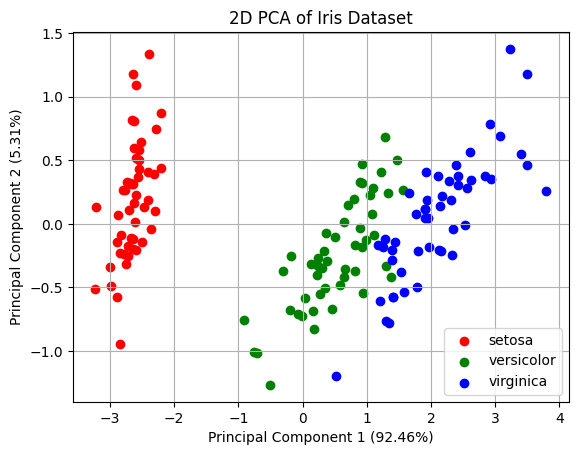

In [8]:
# Créer un DataFrame à partir des données transformées
transformed_df = pd.DataFrame(data=transformed_data, columns=['Principal Component 1', 'Principal Component 2'])

# Ajouter les labels des classes au DataFrame
transformed_df['Target'] = iris.target

# Afficher chaque classe avec une couleur différente
colors = ['r', 'g', 'b']
targets = [0, 1, 2]

for target, color in zip(targets, colors):
    indicesToKeep = transformed_df['Target'] == target
    plt.scatter(transformed_df.loc[indicesToKeep, 'Principal Component 1'], transformed_df.loc[indicesToKeep, 'Principal Component 2'], c=color)

# Calculer la proportion de variance expliquée pour chaque composante principale
explained_variance_ratio = pca.explained_variance_ratio_

# Convertir la proportion de variance expliquée en pourcentage
explained_variance_ratio_percentage = explained_variance_ratio * 100

# Afficher le graphique 2D de l'ACP
plt.xlabel('Principal Component 1 ({}%)'.format(round(explained_variance_ratio_percentage[0], 2)))
plt.ylabel('Principal Component 2 ({}%)'.format(round(explained_variance_ratio_percentage[1], 2)))
plt.title('2D PCA of Iris Dataset')
plt.legend(iris.target_names)
plt.grid()
plt.show()

## Question 5 : proportion de variance expliquée

Calculer et afficher la proportion de variance expliquée (explained_variance_ratio_) pour chaque composante principale

In [9]:
# Afficher la proportion de variance expliquée pour chaque composante principale en pourcentage
print("Explained Variance Ratio (in %): ", explained_variance_ratio_percentage)
print("Total Explained Variance Ratio (in %): ", sum(explained_variance_ratio_percentage))

Explained Variance Ratio (in %):  [92.46187232  5.30664831]
Total Explained Variance Ratio (in %):  97.7685206318795


## Question 6 : Dimension minimales requises

Écrire un code Python permettant de calculer le nombre de dimensions requises pour préserver 95% de la variance du jeu de données:
1. Utiliser la méthode cumsum() de numpy
2. Proposer une autre méthode en jouant sur la valeur du paramètre n_components de la classe PCA de Scikit-learn.

In [10]:
def dimension_minimale(data:np.ndarray , taux: float) -> int:
    """
    Calcule la dimension minimale nécessaire pour conserver un certain taux de variance expliquée.

    Parameters:
        data (np.ndarray): Les données transformées après l'ACP.
        taux (float): Le taux de variance expliquée à conserver.

    Returns:
        int: La dimension minimale nécessaire
    """
    
    # Appliquer l'ACP avec toutes les composantes
    pca = PCA()
    pca.fit(data)
    
    # Calculer la somme cumulée de la proportion de variance expliquée
    cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
    
    # Trouver le nombre de dimensions requises pour préserver le taux de variance spécifié
    num_dimensions = np.where(cumulative_explained_variance >= taux)[0][0] + 1
    print("Nombre de dimensions pour preserver {}% de la variance (methode manuelle) : ".format(taux), num_dimensions)
    
    # Appliquer l'ACP avec le taux de variance spécifié
    pca = PCA(n_components=taux)
    transformed_data = pca.fit_transform(data)
    
    # Afficher le nombre de composantes principales
    print("Nombre de dimensions pour preserver {}% de la variance (methode PCA) : ".format(taux), transformed_data.shape)
    return num_dimensions

#? Calculer la dimension minimale nécessaire
dimension_minimale(iris.data, 0.95)

Nombre de dimensions pour preserver 0.95% de la variance (methode manuelle) :  2
Nombre de dimensions pour preserver 0.95% de la variance (methode PCA) :  (150, 2)


2

## Question 7 : Visualisation de la variance expliquée

Représenter  la  contribution  de  la  variance  en  fonction  du  nombre  de  dimensions (représenter graphiquement cumsum). Interpréter

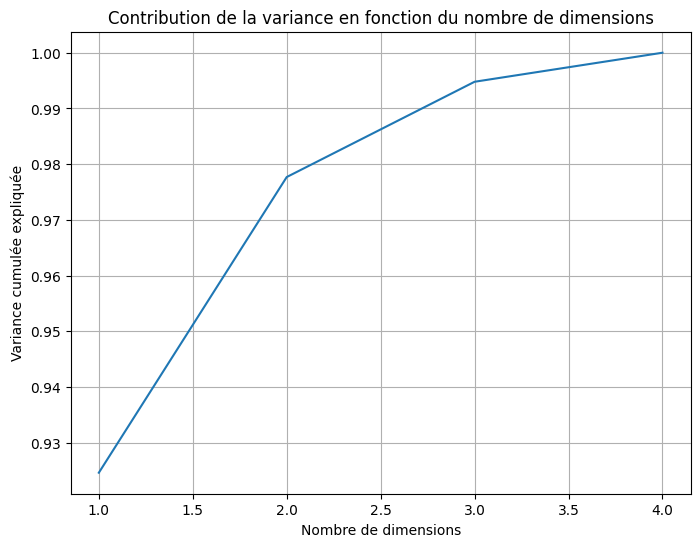

In [11]:
#?  Contribution  de  la  variance  en  fonction  du  nombre  de  dimensions
# Appliquer l'ACP avec toutes les composantes
pca = PCA()
pca.fit(iris.data)

# Calculer la somme cumulée de la proportion de variance expliquée
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Créer un graphique de la somme cumulée de la proportion de variance expliquée
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance)
plt.xlabel('Nombre de dimensions')
plt.ylabel('Variance cumulée expliquée')
plt.title('Contribution de la variance en fonction du nombre de dimensions')
plt.grid()
plt.show()

On remarque que les deux premières composantes principales expliquent plus de 95% de la variance.
Par ailleurs, avec 4 composantes ont arrives à 100% de la variance expliquée.